<a href="https://colab.research.google.com/github/nsanka/deep_learning/blob/main/Self_Driving_Car/MNIST_digits_recognition_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Digits recognition using Keras

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [2]:
np.random.seed(0)

In [3]:
# Load train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Check
assert(X_train.shape[0] == y_train.shape[0]), "The number of training images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of test images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The training dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The test dimensions of images are not 28x28"

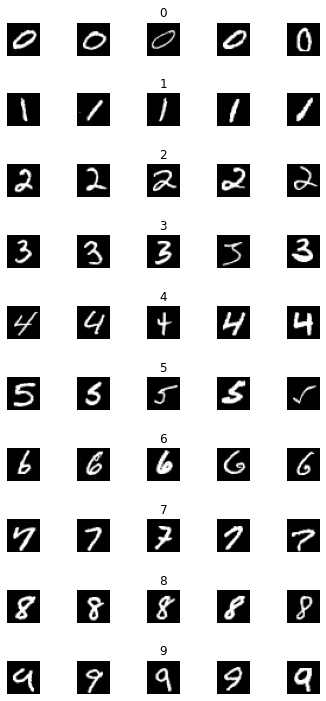

In [6]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off') 
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

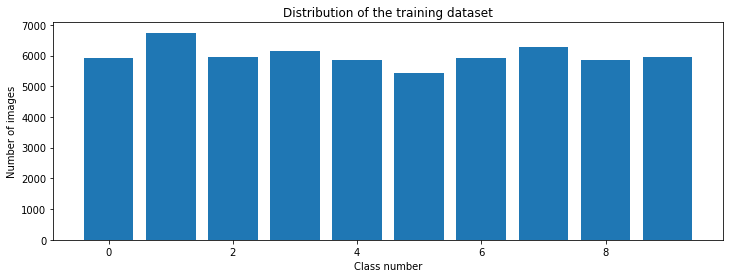

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
# Create categorical output values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

In [11]:
def leNet_model():
    model = Sequential()
    # Input layer with 30 Filters of 5x5, 28x28x1 input dimensions, default stride of 1, default no-padding
    # image will be 24x24 of 30
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    # Pooling Layer of 2x2 size, image will be 12x12 of 30
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 2nd Conv Layer with 15 Filters of 3x3, image will be 10x10 of 15
    model.add(Conv2D(15, (3, 3), activation='relu'))
    # 2nd Pooling Layer of 2x2 size, image will be 5x5 of 15
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the data of 375 nodes
    model.add(Flatten())
    # Last Dense Layer of 500 nodes
    model.add(Dense(500, activation='relu'))
    # Add Dropout Layer to fix the overfitting
    model.add(Dropout(0.5))
    # Output layer with 10 classes
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [13]:
# Train model with training dataset
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 4s 10ms/step - loss: 0.5420 - accuracy: 0.8217 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0541 - val_accuracy: 0.9842
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0594 - accuracy: 0.9823 - val_loss: 0.0541 - val_accuracy: 0.9855
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0319 - val_accuracy: 0.9912
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0329 - val_accuracy: 0.9918
Epoch

Text(0.5, 0, 'epoch')

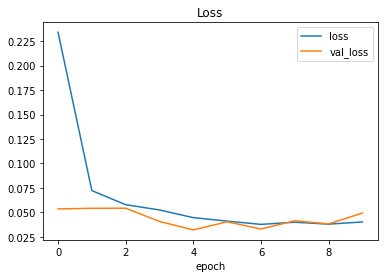

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

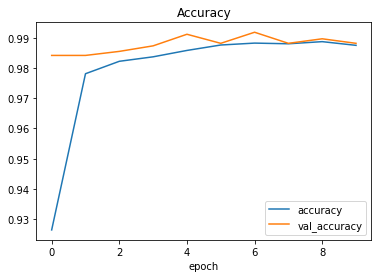

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.04805465415120125
Test accuracy: 0.9868000149726868


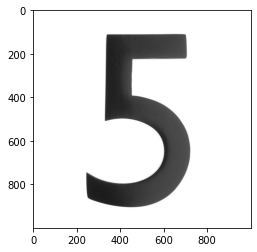

In [17]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
#url = 'https://user-images.githubusercontent.com/54076398/74993823-8727c680-544c-11ea-96d4-c656e70c54b3.jpg'
#url = 'https://www.neuralnine.com/wp-content/uploads/2019/09/3.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

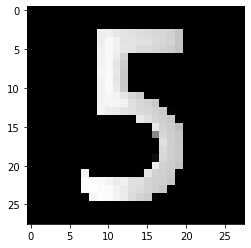

In [18]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scaled = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scaled)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [19]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [20]:
prediction = np.argmax(model.predict(image), axis=-1)
print('Predicted digit:', prediction)

Predicted digit: [5]


In [21]:
# To see the output of two Conv Layers, get instantiates of these layers using Model API
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


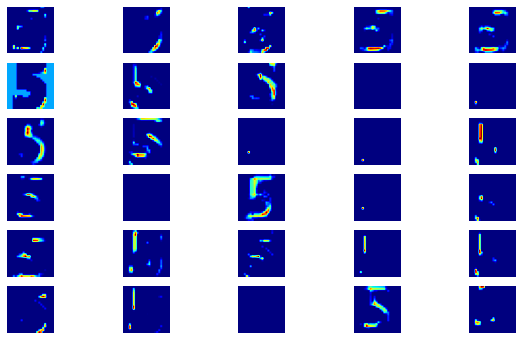

In [22]:
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

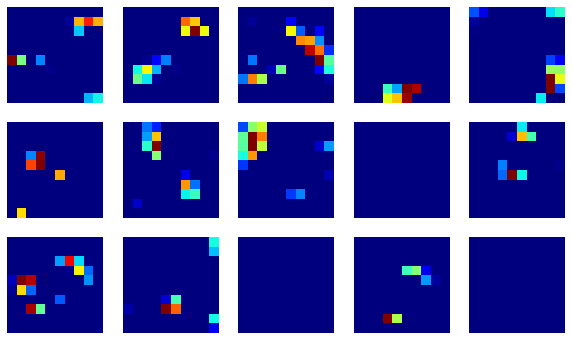

In [23]:
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')